In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [8]:
nba = pd.read_csv("..\\data\\nba\\nba_contracts_history_2.csv").dropna(how='all')

In [9]:
nba.head()

,NAME,CONTRACT_START,CONTRACT_END,AVG_SALARY,AGE,GP,W,L,MIN,PTS,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,2019,2020,2564753.0,32.0,69.0,27.0,42.0,2091.0,840.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,2015,2017,21165675.0,27.0,72.0,34.0,38.0,2100.0,1236.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,2011,2014,10759763.5,22.0,80.0,31.0,49.0,2047.0,566.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,2015,2018,8143323.5,25.0,82.0,39.0,43.0,2581.0,1258.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,2018,2019,13410739.0,32.0,81.0,35.0,46.0,2463.0,1347.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0


In [10]:
nba.columns

Index(['NAME', 'CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP',
       'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF',
       '+/-'],
      dtype='object')

In [11]:
nba = nba[['NAME', 'CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP', 'W', 'L', 'MIN','+/-']].drop_duplicates()

In [12]:
#nba = nba[['CONTRACT_START', 'CONTRACT_END', 'AVG_SALARY', 'AGE', 'GP', 'W', 'L', 'MIN','+/-']]

In [13]:
nba2 = nba.copy()
nba2_nombres = nba2['NAME']
nba2 = nba2[['AVG_SALARY','+/-']]

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(nba2)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0: 'AVG_SALARY', 1:'+/-'})

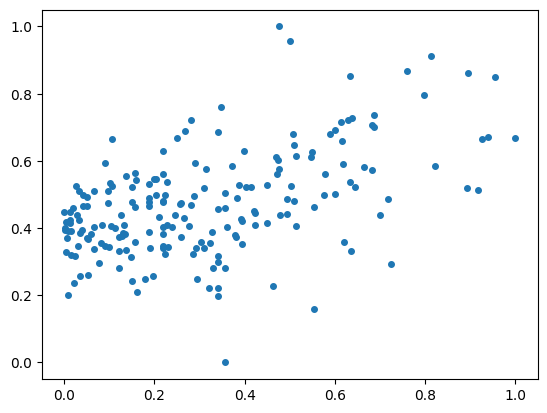

In [15]:
x1 = df_escalado['AVG_SALARY'].values
y1 = df_escalado['+/-'].values
plt.plot(x1,y1, 'o', markersize=4)

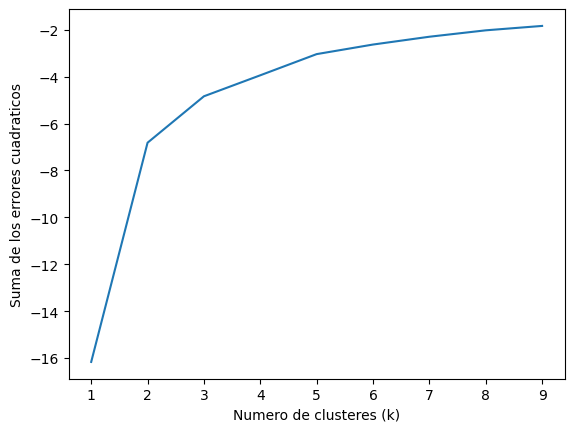

In [16]:
nc = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Numero de clusteres (k)')
plt.ylabel('Suma de los errores cuadraticos')
plt.plot(nc,score)

In [17]:
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
centroids

array([[0.72913772, 0.88709952],
       [0.09509098, 0.4266004 ],
       [0.29040156, 0.32640032],
       [0.40600884, 0.54170075],
       [0.69137711, 0.58229948]])

In [18]:
labels = kmeans.predict(df_escalado)
nba2['label'] = labels

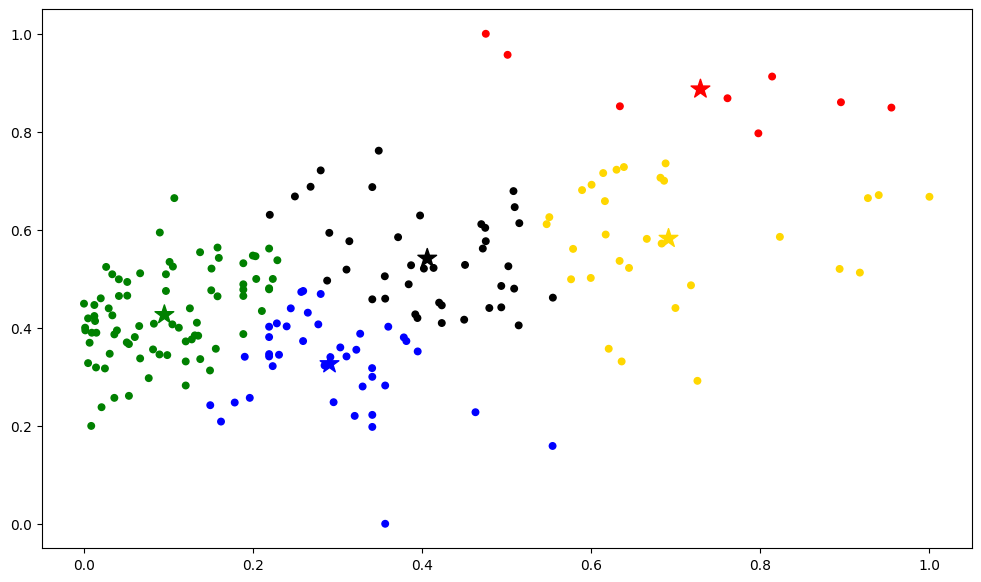

In [26]:
colores = ['red', 'green', 'blue', 'black', 'gold']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.rcParams['figure.figsize'] = (12,7)
plt.scatter(x1,y1, c=asignar, s=22)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', c=['red', 'green', 'blue', 'black', 'gold'], s=200)
plt.show()

In [27]:
nba2['label']=labels

In [28]:
nba3 = nba.copy()
nba3_nombres =  nba3[['NAME']]
nba3 = nba3[['AVG_SALARY','AGE','+/-']]

In [29]:
min_max_scaler1 = preprocessing.MinMaxScaler()
df_escalado1 = min_max_scaler1.fit_transform(nba3)
df_escalado1 = pd.DataFrame(df_escalado1)
df_escalado1 = df_escalado1.rename(columns= {0: 'AVG_SALARY', 1: 'AGE', 2:'+/-'})

In [30]:
x = df_escalado1['AVG_SALARY'].values
y = df_escalado1['AGE'].values
z = df_escalado1['+/-'].values

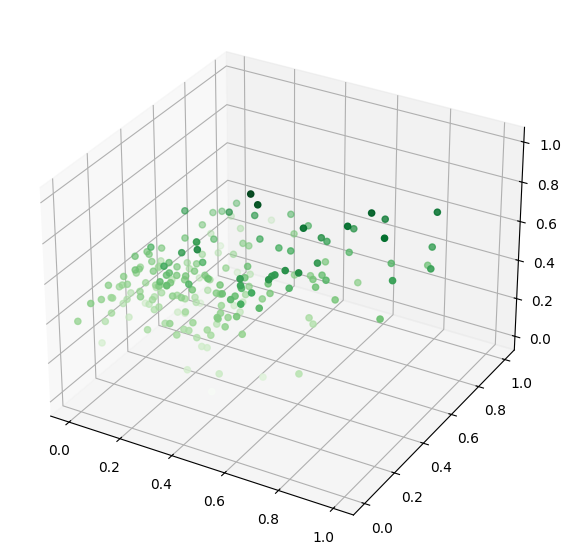

In [31]:
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=z,cmap='Greens')

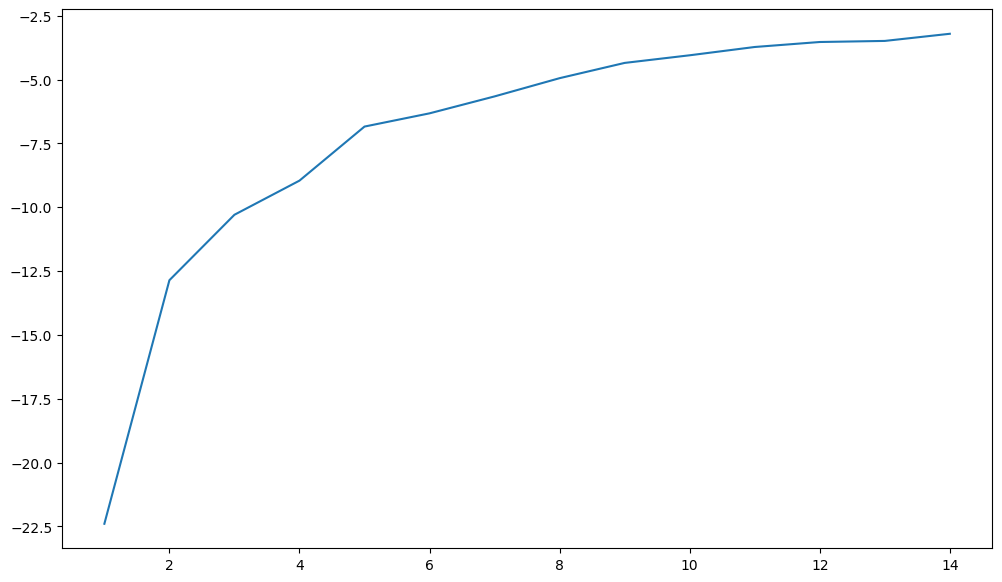

In [34]:
nc = range(1,15)
kmeans2 = [KMeans(n_clusters=i) for i in nc]
score2 = [kmeans2[i].fit(df_escalado1).score(df_escalado1) for i in range(len(kmeans2))]
plt.plot(nc, score2)

In [35]:
kmeans2 = KMeans(n_clusters=4).fit(df_escalado1)
centroids2 = kmeans2.cluster_centers_

In [36]:
labels2 = kmeans2.predict(df_escalado1)
nba3['label'] = labels2

In [ ]:
colores= ['red','green','blue','orange']
asignar= []
for row in labels2:
    asignar.append(colores[row])
ax = plt.axes(projection='3d')